In [1]:
#Import Necessary Liabraries for predection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set_theme(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset from CSV to pandas dataframe.

data_titanic = pd.read_csv('https://raw.githubusercontent.com/snehuuu28/MYDAILYWORK/main/TITANIC%20SURVIVAL%20PREDICTION/tested.csv')

# Exploratory Data Analysis(EDA)

In [4]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#to check shape of data(in terms of rows & columns)

data_titanic.shape

(418, 12)

In [6]:
#checking information from data

data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
#Checking Null Values

data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Now replacing missing values in "age" with median value
data_titanic["Age"].fillna(data_titanic["Age"].mean(),inplace=True)

In [9]:
#working on 3rd missing value column "Fare" 
data_titanic["Fare"].fillna(data_titanic["Fare"].median(), inplace=True)

In [10]:
# In "Age" variable 86 is null values
# In "Cabin" column there are 327 null values
# So dropping "Cabin" column. (50% & above Null Values)

In [11]:
#Remove Unwanted Column

data_titanic=data_titanic.drop(columns="Cabin")

In [12]:
data_titanic.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [13]:
data_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


In [14]:
data_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.634534,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
data_titanic["Survived"].unique()

array([0, 1], dtype=int64)

In [16]:
data_titanic["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [17]:
#checking for survived & non survived cases with countplot

In [18]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

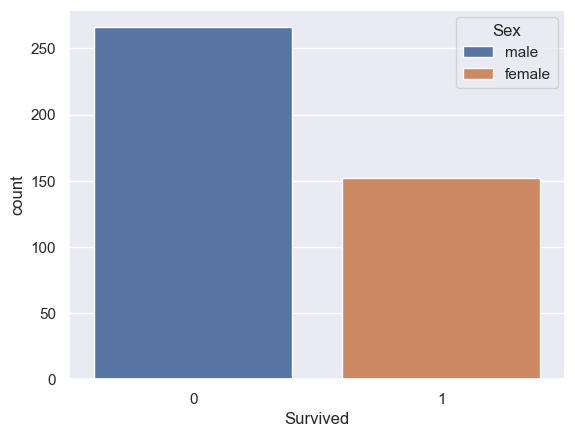

In [19]:
# Countplot for survival counts differentiated by gender
sns.countplot(x='Survived', hue='Sex', data=data_titanic)

<Axes: xlabel='Sex', ylabel='count'>

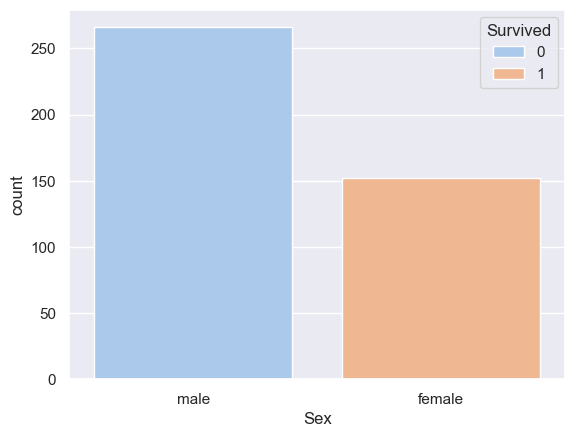

In [20]:
# Countplot for gender with survival status
sns.countplot(x='Sex', hue='Survived', data=data_titanic, palette='pastel')

<Axes: xlabel='Pclass', ylabel='count'>

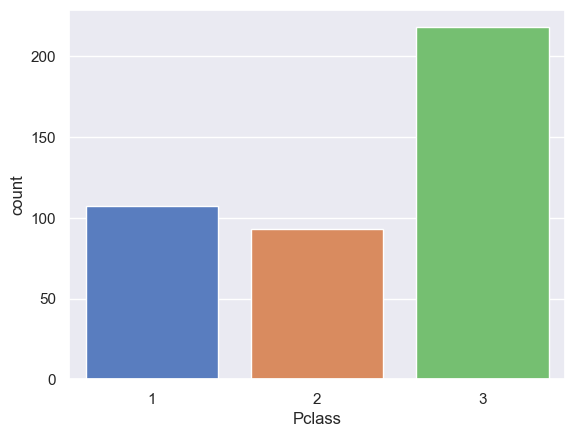

In [21]:
# cheking countplot for "Pclass" column
sns.countplot(x='Pclass', data=data_titanic,palette='muted')

<Axes: xlabel='Survived', ylabel='count'>

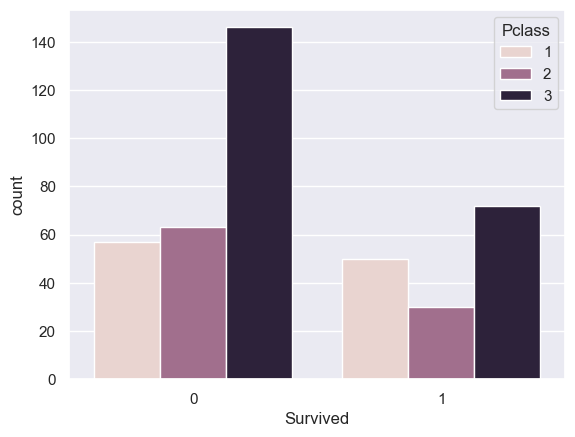

In [22]:
# Countplot with 'Survived' as the target and 'Pclass' as the hue
sns.countplot(x='Survived', hue='Pclass', data=data_titanic)

<Axes: xlabel='Embarked', ylabel='count'>

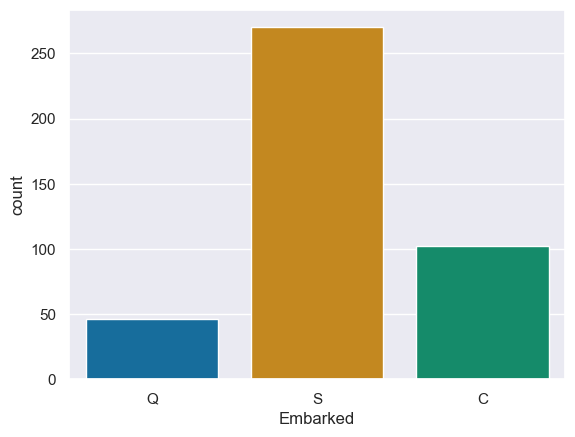

In [23]:
# Countplot for 'Embarked' column
sns.countplot(x='Embarked', data=data_titanic,palette='colorblind')

# Checking numerical attributes

<Axes: xlabel='Age', ylabel='Density'>

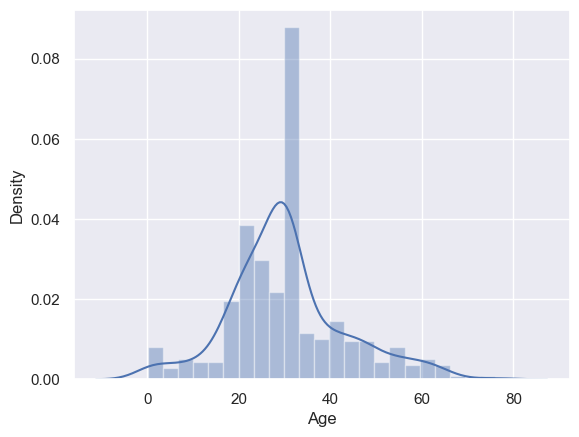

In [25]:
sns.distplot(data_titanic['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

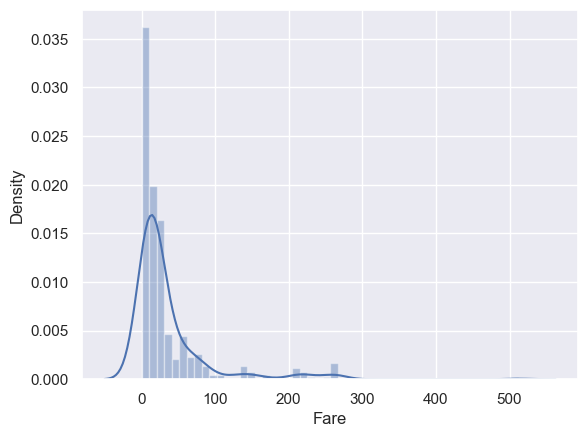

In [26]:
#checking for Fare column

sns.distplot(data_titanic['Fare'])

In [27]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [28]:
data_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [29]:
# Encoding Label

In [30]:
#Categorical to Numerical for further modelling

In [31]:

data_titanic["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [32]:
data_titanic["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    data_titanic[col] = le.fit_transform(data_titanic[col])
    

In [34]:
data_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [35]:
data_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [36]:
# HeatMap to check correlation

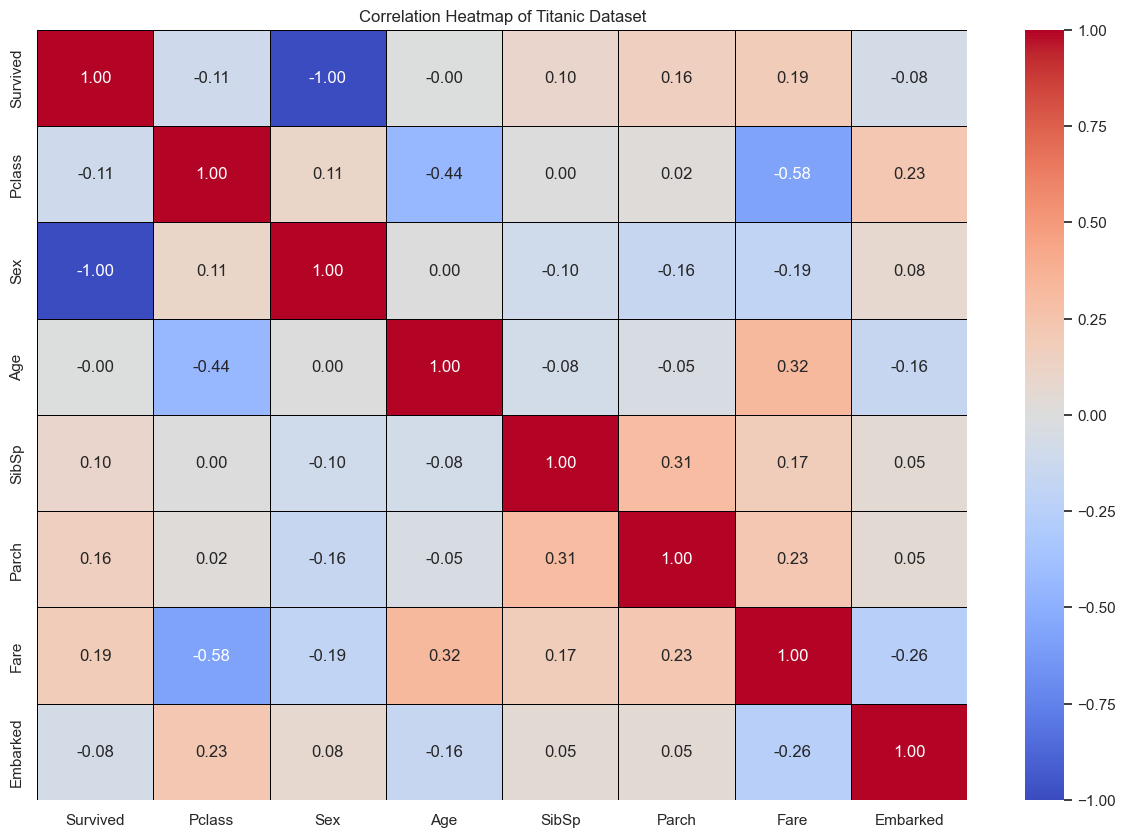

In [37]:
# Calculate the correlation matrix for numeric columns
corr = data_titanic.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, linecolor='black')

# Set the title
plt.title('Correlation Heatmap of Titanic Dataset')

# Show the plot
plt.show()


# Train_Test_Split

In [39]:
# Define features and target variable
x = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data_titanic['Survived']

In [40]:
#Splitting the data into training data & Test data.

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)


In [41]:
# Model Training

In [42]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int32  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [43]:
data_titanic.astype({'Age':'int','Fare':'int'}).dtypes

Survived    int64
Pclass      int64
Sex         int32
Age         int32
SibSp       int64
Parch       int64
Fare        int32
Embarked    int32
dtype: object

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

lr= LogisticRegression()

In [45]:
#training the Logistic Regression model with training data
lr.fit(xtrain, ytrain)

LogisticRegression()

In [46]:
ypred = lr.predict(xtest)
print(f"Train: {lr.score(xtrain,ytrain)}")
print(f"Test: {lr.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

Train: 1.0
Test: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



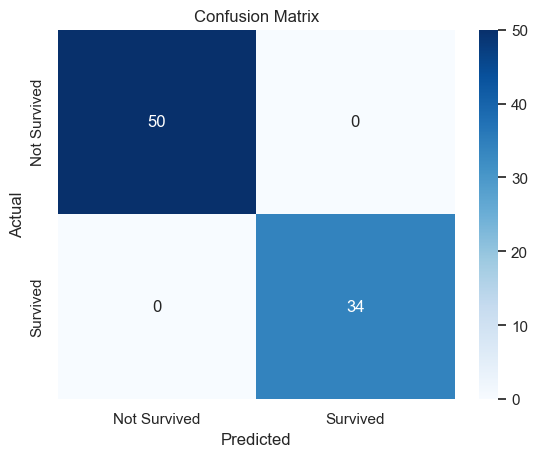

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [48]:
feature_importance = pd.DataFrame({'Feature': xtrain.columns, 'Coefficient': lr.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)


    Feature  Coefficient
4     Parch     0.070498
3     SibSp     0.054896
5      Fare     0.002651
2       Age    -0.001589
6  Embarked    -0.063710
0    Pclass    -0.065576
1       Sex    -6.313261


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(xtrain, ytrain)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 0.1}


In [50]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, xtrain, ytrain, cv=5)
print(f'Cross-Validation Mean Score: {cv_scores.mean():.2f}')


Cross-Validation Mean Score: 1.00


In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)
y_pred_rf = rf.predict(xtest)
print(classification_report(ytest, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

